In [19]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from localenv import consumer_key,consumer_secret,access_token,access_token_secret

In [5]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
# Import CSV file into Data Frame
popular_tweeters = pd.read_csv("PopularAccounts.csv", dtype=str)
popular_tweeters

,Screen Name,Real Name,Tweets,Followers,Following,Favorites Count
0,katyperry,NaN,NaN,NaN,NaN,NaN
1,justinbieber,NaN,NaN,NaN,NaN,NaN
2,BarackObama,NaN,NaN,NaN,NaN,NaN
3,Taylorswift13,NaN,NaN,NaN,NaN,NaN
4,rihanna,NaN,NaN,NaN,NaN,NaN
5,youtube,NaN,NaN,NaN,NaN,NaN
6,theellenshow,NaN,NaN,NaN,NaN,NaN
7,ladygaga,NaN,NaN,NaN,NaN,NaN
8,twitter,NaN,NaN,NaN,NaN,NaN
9,jtimberlake,NaN,NaN,NaN,NaN,NaN


In [7]:
len(popular_tweeters)

50

In [8]:

# Iterate through DataFrame
for index, row in popular_tweeters.iterrows():
    try:
        # Grab the username
        target_user = row["Screen Name"]
        # print(target_user)

        # Use the username with the Twitter API get_user
        user_account = api.get_user(target_user)
        user_real_name = user_account["name"]

        # Get the specific column data
        user_tweets = user_account["statuses_count"]
        user_followers = user_account["followers_count"]
        user_following = user_account["friends_count"]
        user_favorites = user_account["favourites_count"]

        # Replace the row information for each
        popular_tweeters.at[index, "Real Name"] = user_real_name
        popular_tweeters.at[index, "Tweets"] = user_tweets
        popular_tweeters.at[index, "Followers"] = user_followers
        popular_tweeters.at[index, "Following"] = user_following
        popular_tweeters.at[index, "Favorites Count"] = user_favorites
    
    except Exception as e:
        print(f"exception for {row['Screen Name']}: {e}")
        popular_tweeters.drop(index=index,inplace=True)
        
# Export the new CSV
popular_tweeters.to_csv("PopularAccountsInfo.csv", index=False)

# View the DataFrame
popular_tweeters.head()

exception for kanyewest: [{'code': 50, 'message': 'User not found.'}]


,Screen Name,Real Name,Tweets,Followers,Following,Favorites Count
0,katyperry,KATY PERRY,8844,108648169,203,6022
1,justinbieber,Justin Bieber,30628,105420483,316257,3445
2,BarackObama,Barack Obama,15497,100368352,624483,10
3,Taylorswift13,Taylor Swift,84,85601084,0,126
4,rihanna,Rihanna,10069,86287219,1123,1023


In [9]:
try:
    api.get_user("kanyewest")
except Exception as e:
    print(e)

[{'code': 50, 'message': 'User not found.'}]


In [10]:
popular_tweeters.describe()

,Screen Name,Real Name,Tweets,Followers,Following,Favorites Count
count,49,49,49,49,49,49
unique,49,49,49,49,48,44
top,niallofficial,Ariana Grande,190836,41142826,132,0
freq,1,1,1,1,2,4


In [11]:
# Calculate Averages
# Create DataFrame
averages = {"Average Tweet Count": popular_tweeters["Tweets"].mean(), 
            "Average Follower Count": popular_tweeters["Followers"].mean(), 
            "Average Following Count": popular_tweeters["Following"].mean(),
            "Average Favorites Count": popular_tweeters["Favorites Count"].mean()}

# Create a Dataframe of hte averages
pd.DataFrame(averages, index=[0])

,Average Favorites Count,Average Follower Count,Average Following Count,Average Tweet Count
0,1820.122449,4.968036e+07,32633.081633,31880.530612


In [13]:
# Extract Tweet Counts and Follower Counts
tweet_counts = popular_tweeters["Tweets"]
follower_counts = popular_tweeters["Followers"]
following_counts = popular_tweeters["Following"]
favorite_counts = popular_tweeters["Favorites Count"]

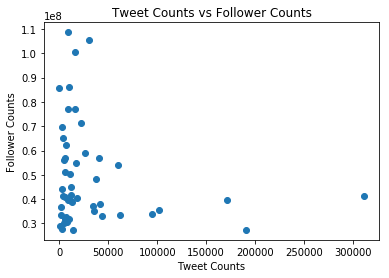

In [16]:
plt.scatter(tweet_counts, follower_counts)
plt.xlabel("Tweet Counts")
plt.ylabel("Follower Counts")
plt.title("Tweet Counts vs Follower Counts")
plt.show()

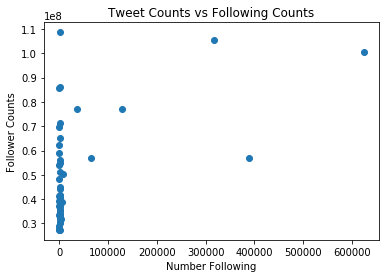

In [20]:
plt.scatter(following_counts, follower_counts)
plt.xlabel("Number Following")
plt.ylabel("Follower Counts")
plt.title("Tweet Counts vs Following Counts")
plt.show()

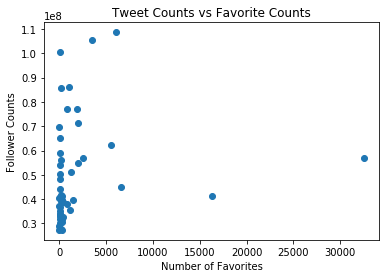

In [21]:
plt.scatter(favorite_counts, follower_counts)
plt.xlabel("Number of Favorites")
plt.ylabel("Follower Counts")
plt.title("Tweet Counts vs Favorite Counts")
plt.show()